In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive

In [5]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/train2/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/test2/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 50 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0,2))
model.add(Dense(10,activation='Softmax'))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 64,
                  epochs=50,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 14.5086 - accuracy: 0.0200   

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2/2 [==============================] - 18s 11s/step - loss: 14.5086 - accuracy: 0.0200 - val_loss: 8.6718 - val_accuracy: 0.1000
Epoch 2/50
2/2 [==============================] - 17s 7s/step - loss: 7.8408 - accuracy: 0.1400 - val_loss: 3.3373 - val_accuracy: 0.1500
Epoch 3/50
2/2 [==============================] - 18s 12s/step - loss: 2.9379 - accuracy: 0.0400 - val_loss: 2.5001 - val_accuracy: 0.1000
Epoch 4/50
2/2 [==============================] - 20s 13s/step - loss: 2.3666 - accuracy: 0.0800 - val_loss: 2.3111 - val_accuracy: 0.1000
Epoch 5/50
2/2 [==============================] - 19s 12s/step - loss: 2.2732 - accuracy: 0.2400 - val_loss: 2.3193 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 17s 10s/step - loss: 2.2747 - accuracy: 0.1600 - val_loss: 2.3242 - val_accuracy: 0.2000
Epoch 7/50
2/2 [==============================] - 16s 10s/step - loss: 2.2717 - accuracy: 0.1200 - val_loss: 2.3285 - val_accuracy: 0.1000
Epoch 8/50
2/2 [==================

In [9]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Sai số kiểm tra là:  6.7768402099609375
Độ chính xác kiểm tra là:  0.25


In [12]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


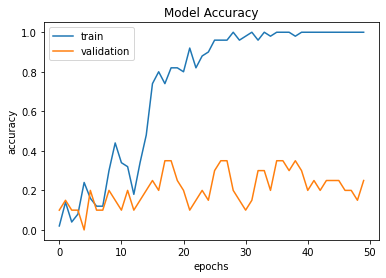

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [14]:
model.save('model_fruit.h5')
from tensorflow.keras.models import load_model
model=load_model('model_fruit.h5')

In [15]:
classes = ['bánh mì','bánh xèo','bún','cơm sườn','cua hấp','gà chiên','gỏi','nem','sò hấp','thịt nướng']

In [24]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from google.colab import files 
uploadfile=files.upload()

Saving 2.goixoaitom2.png to 2.goixoaitom2 (1).png


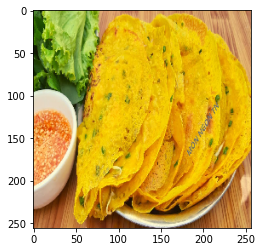

In [20]:
img = load_img("maxresdefault.jpg",target_size = (256,256))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255

In [21]:
np.argmax(model.predict(img),axis=1)

array([1])

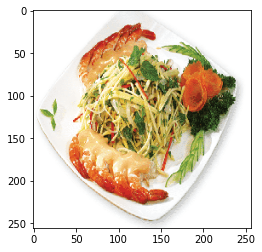

In [25]:
img = load_img("2.goixoaitom2.png",target_size = (256,256))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255

In [26]:
np.argmax(model.predict(img),axis=1)

array([3])

In [27]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CNNMonAn.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CNNMonAn.ipynb to pdf
[NbConvertApp] Support files will be in CNNMonAn_files/
[NbConvertApp] Making directory ./CNNMonAn_files
[NbConvertApp] Making directory ./CNNMonAn_files
[NbConvertApp] Writing 50909 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 166145 bytes to /content/drive/My Drive/CNNMonAn.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'